# Regression

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

<ipython-input-2-350372bb6bbf>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
<ipython-input-2-350372bb6bbf>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

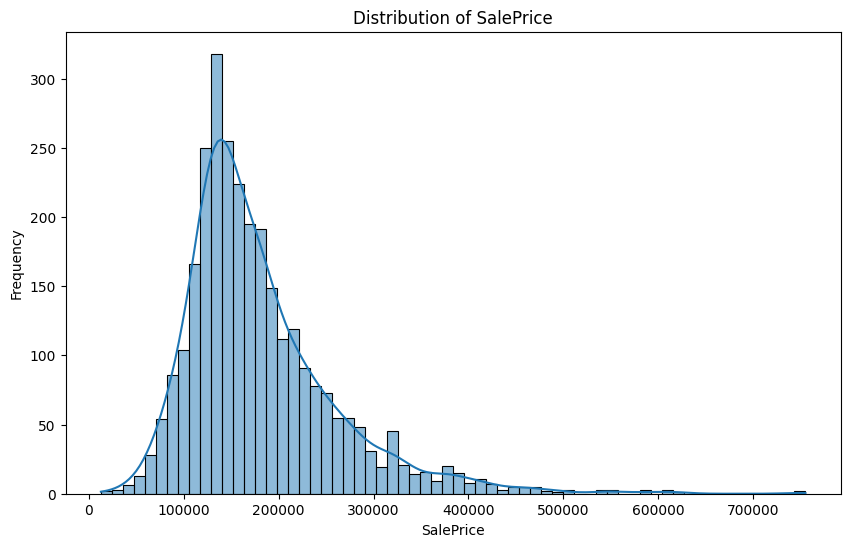

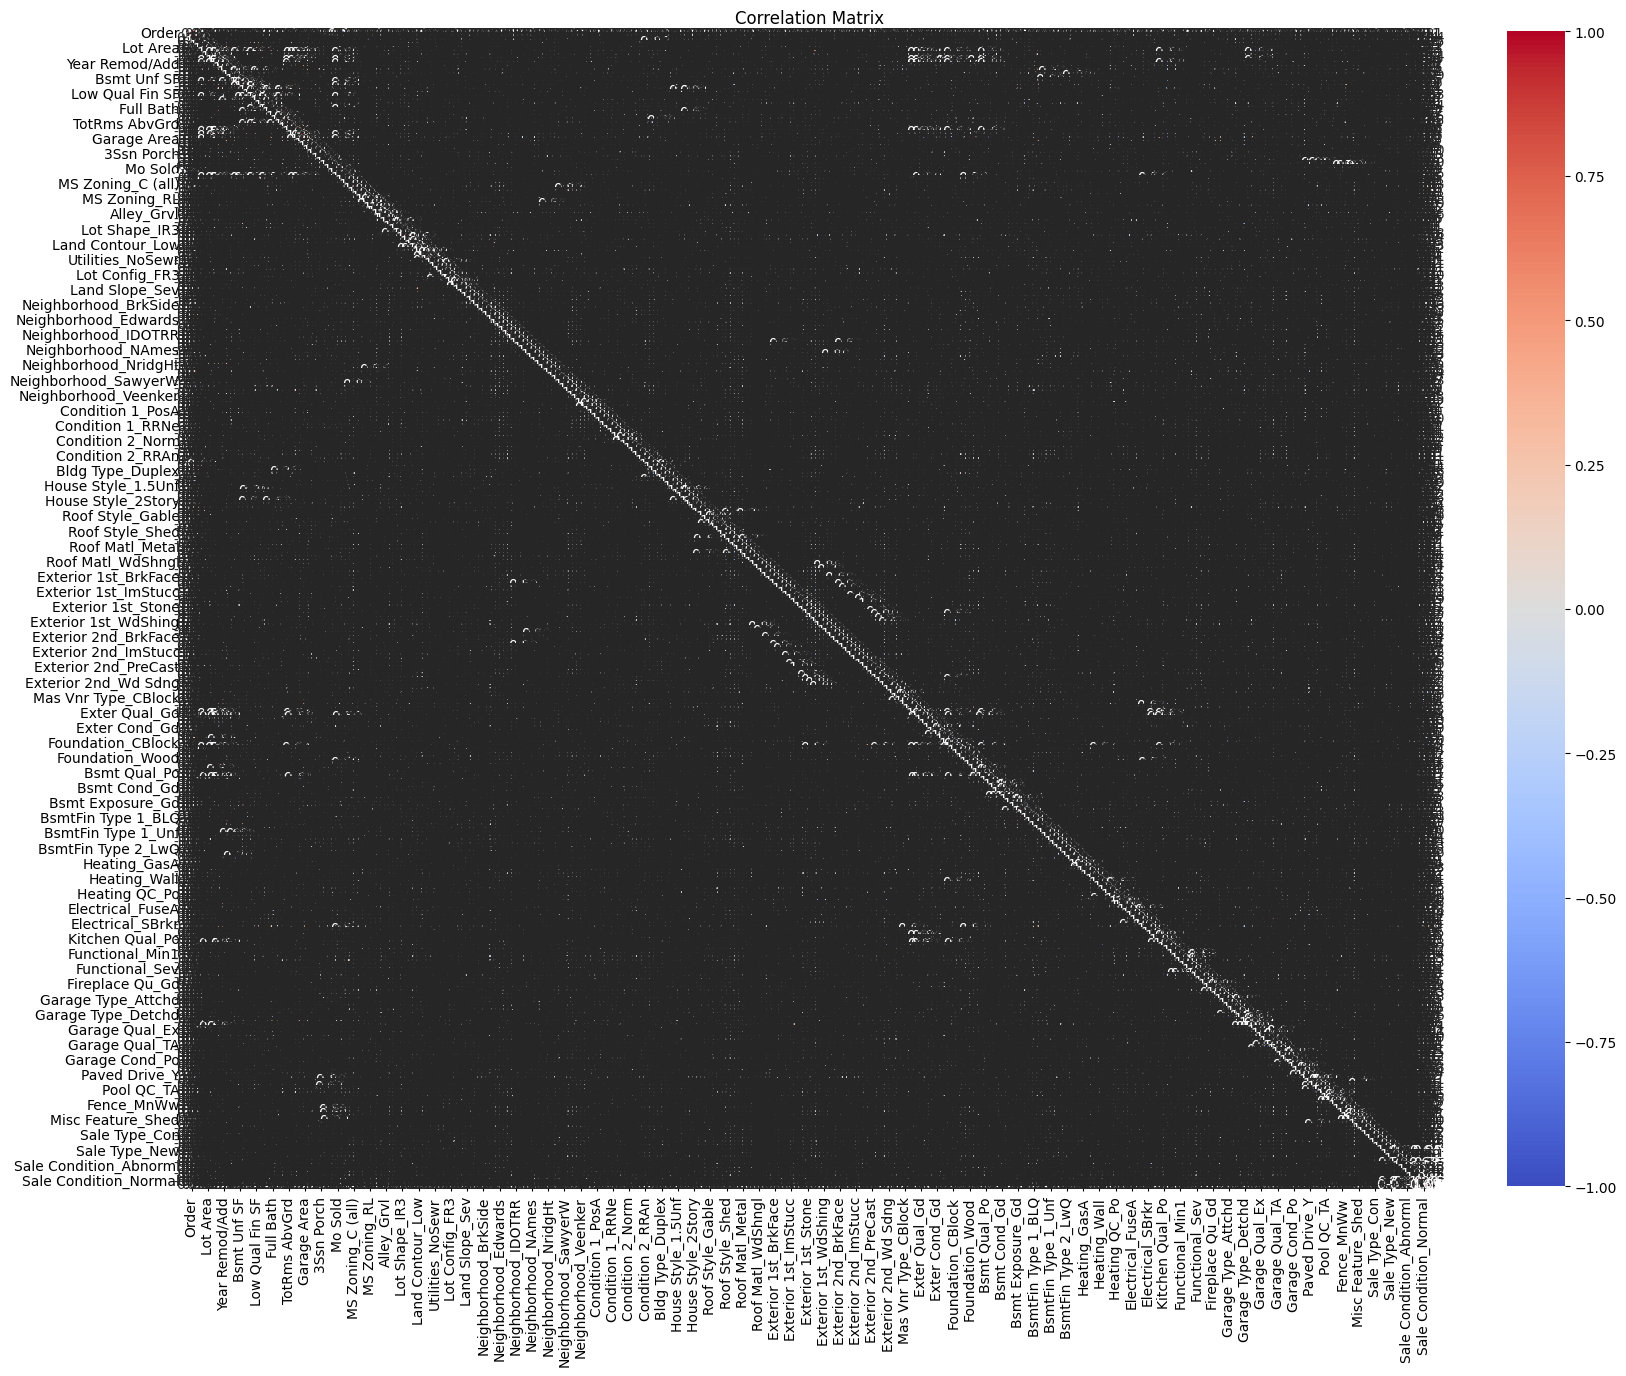

Simple Linear Regression - MSE: 3821184066.2726417, R2: 0.5233974153691151
Multiple Linear Regression - MSE: 1957403318.99344, R2: 0.7558601038794389
Polynomial Regression (degree 2) - MSE: 3750566954.617642, R2: 0.5322052344509032


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('AmesHousing.csv')

# Display the first few rows of the dataset
print(df.head())

# Display basic information about the dataset
print(df.info())

# Display summary statistics of the dataset
print(df.describe())

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Fill missing values with median for numerical columns and mode for categorical columns
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)

# Verify that there are no missing values left
print(df.isnull().sum().sum())

# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df)

# Visualize the distribution of the target variable (SalePrice)
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(20, 15))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Select features for Simple Linear Regression (using Gr Liv Area)
X_simple = df[['Gr Liv Area']]
y = df['SalePrice']

# Split the data into training and testing sets
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# Create and train the Simple Linear Regression model
simple_lr = LinearRegression()
simple_lr.fit(X_train_simple, y_train_simple)

# Make predictions on the test set
y_pred_simple = simple_lr.predict(X_test_simple)

# Evaluate the Simple Linear Regression model
mse_simple = mean_squared_error(y_test_simple, y_pred_simple)
r2_simple = r2_score(y_test_simple, y_pred_simple)
print(f'Simple Linear Regression - MSE: {mse_simple}, R2: {r2_simple}')

# Select features for Multiple Linear Regression (using Gr Liv Area, Overall Qual, Year Built)
X_multiple = df[['Gr Liv Area', 'Overall Qual', 'Year Built']]
y = df['SalePrice']

# Split the data into training and testing sets
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(X_multiple, y, test_size=0.2, random_state=42)

# Create and train the Multiple Linear Regression model
multiple_lr = LinearRegression()
multiple_lr.fit(X_train_multiple, y_train_multiple)

# Make predictions on the test set
y_pred_multiple = multiple_lr.predict(X_test_multiple)

# Evaluate the Multiple Linear Regression model
mse_multiple = mean_squared_error(y_test_multiple, y_pred_multiple)
r2_multiple = r2_score(y_test_multiple, y_pred_multiple)
print(f'Multiple Linear Regression - MSE: {mse_multiple}, R2: {r2_multiple}')

# Select features for Polynomial Regression (using Gr Liv Area)
X_poly = df[['Gr Liv Area']]
y = df['SalePrice']

# Transform features to polynomial features (degree 2)
poly_features = PolynomialFeatures(degree=2)
X_poly_transformed = poly_features.fit_transform(X_poly)

# Split the data into training and testing sets
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly_transformed, y, test_size=0.2, random_state=42)

# Create and train the Polynomial Regression model
poly_lr = LinearRegression()
poly_lr.fit(X_train_poly, y_train_poly)

# Make predictions on the test set
y_pred_poly = poly_lr.predict(X_test_poly)

# Evaluate the Polynomial Regression model
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)
print(f'Polynomial Regression (degree 2) - MSE: {mse_poly}, R2: {r2_poly}')



# Binaryclass / Multiclass Classification

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer, load_iris

# Logistic Regression for Binary Classification

# Load the breast cancer dataset (binary classification)
breast_cancer = load_breast_cancer()
X_bc = breast_cancer.data
y_bc = breast_cancer.target

# Split the data into training and testing sets
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
logistic_regression = LogisticRegression(max_iter=10000)
logistic_regression.fit(X_train_bc, y_train_bc)

# Make predictions on the test set
y_pred_bc = logistic_regression.predict(X_test_bc)

# Evaluate the Logistic Regression model
accuracy_bc = accuracy_score(y_test_bc, y_pred_bc)
conf_matrix_bc = confusion_matrix(y_test_bc, y_pred_bc)
class_report_bc = classification_report(y_test_bc, y_pred_bc)

print(f'Logistic Regression (Binary Classification) - Accuracy: {accuracy_bc}')
print('Confusion Matrix:')
print(conf_matrix_bc)
print('Classification Report:')
print(class_report_bc)

# Multinomial Logistic Regression for Multiclass Classification

# Load the iris dataset (multiclass classification)
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Split the data into training and testing sets
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Create and train the Multinomial Logistic Regression model
multinomial_logistic_regression = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
multinomial_logistic_regression.fit(X_train_iris, y_train_iris)

# Make predictions on the test set
y_pred_iris = multinomial_logistic_regression.predict(X_test_iris)

# Evaluate the Multinomial Logistic Regression model
accuracy_iris = accuracy_score(y_test_iris, y_pred_iris)
conf_matrix_iris = confusion_matrix(y_test_iris, y_pred_iris)
class_report_iris = classification_report(y_test_iris, y_pred_iris)

print(f'Multinomial Logistic Regression (Multiclass Classification) - Accuracy: {accuracy_iris}')
print('Confusion Matrix:')
print(conf_matrix_iris)
print('Classification Report:')
print(class_report_iris)


Logistic Regression (Binary Classification) - Accuracy: 0.956140350877193
Confusion Matrix:
[[39  4]
 [ 1 70]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Multinomial Logistic Regression (Multiclass Classification) - Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
